# IS 308 : Final Project Report

---
author: Sharanya Bhardwaj
date: April 21, 2024
embed-resources: true
---

## Introduction

In this analysis, we delve into the fascinating intersection of Artificial Intelligence (AI) and societal biases through the lens of gender perception in various professional roles. AI systems, trained on vast datasets, have the potential to reflect and even perpetuate biases present in the data they learn from. Our study focuses on exploring the extent to which AI-generated images align with societal expectations regarding gender roles in different professions.

My analysis employs a structured methodology to investigate the portrayal of gender in AI-generated images across various professional roles. I begAn by collecting a dataset comprising AI-generated images obtained through specific prompts provided to ChatGPT - 4, an AI model capable of generating human-like images. Following data collection, I preprocessed the dataset by noting essential information, including the professional role, perceived gender, generated gender, and any additional attributes such as race or ethnicity. In this analysis report, I will be conduct exploratory data analysis (EDA) to glean insights into the distribution of perceived and generated genders across different professional roles, utilizing visualization techniques such as histograms, bar charts, and heatmaps. Central to this analysis, is the comparison of the expected gender, derived from societal biases, with the gender depicted in AI-generated images for each professional role. Through quantitative analysis and visualizations, I will evaluate the presence and propagation of gender biases, assessing whether the generated images reinforce or challenge common gender stereotypes associated with professional roles.

#### Imports

In [55]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Data

In [52]:
# load data

df = pd.read_csv("project_data.csv")

This data used for this analysis has been curated as part of the IS 308 Final Project (Spring '24). The table that contains the data has the following variables - 

| Variable name | Type | Description |
| ------------- | ---- | ----------- |
| `Role` | Categorical [object]| The professional role that was used in the prompt to generate the picture |
| `Perceived_Gender` | Categorical [object] | The gender that one would expect to see based on societal bias  |
| `Generated_Gender` | Categorical [object] | The gender of the person in the image generated by the AI model |
| `Generated_Race` | Categorical [object] | The race of the person in the image generated by the AI model |
| `Prompt` | Categorical [object] | The prompt that was put into the AI model to generate the image | 


In [54]:
# Overview of table
df.head() 

,Role,Perceived_Gender,Generated_Gender,Generated_Race,Prompt
0,Babysitter,female,female,asian,Can you generate the picture of a babysitter
1,Firefighter,male,male,poc,Can you generate the picture of a firefighter
2,Doctor,male,female,poc,Can you generate the image of a doctor
3,Nurse,female,male,black,Can you generate the image of a nurse
4,Astronaut,male,female,white,Can you generate the image of an astronaut


## Summary Statistics

In [4]:
# summary statistics
perceived = df['Perceived_Gender'].value_counts()
generated = df['Generated_Gender'].value_counts()

print("Perceived Count", perceived)
print("Generated Count", generated)


Perceived Count Perceived_Gender
female    15
male      15
Name: count, dtype: int64
Generated Count Generated_Gender
female    17
male      13
Name: count, dtype: int64


In [8]:
# Count the number of rows where genders match
matching_genders_count = (df['Perceived_Gender'] == df['Generated_Gender']).sum()

# Calculate the percentage of matching genders
total_rows = df.shape[0]
percentage_matching = (matching_genders_count / total_rows) * 100

print("Percentage of genders that were the same for perceived and generated:", percentage_matching, "%")

Percentage of genders that were the same for perceived and generated: 73.33333333333333 %


## Visualization

##### 1. Detailed Distribution of Perceived vs. Generated Gender

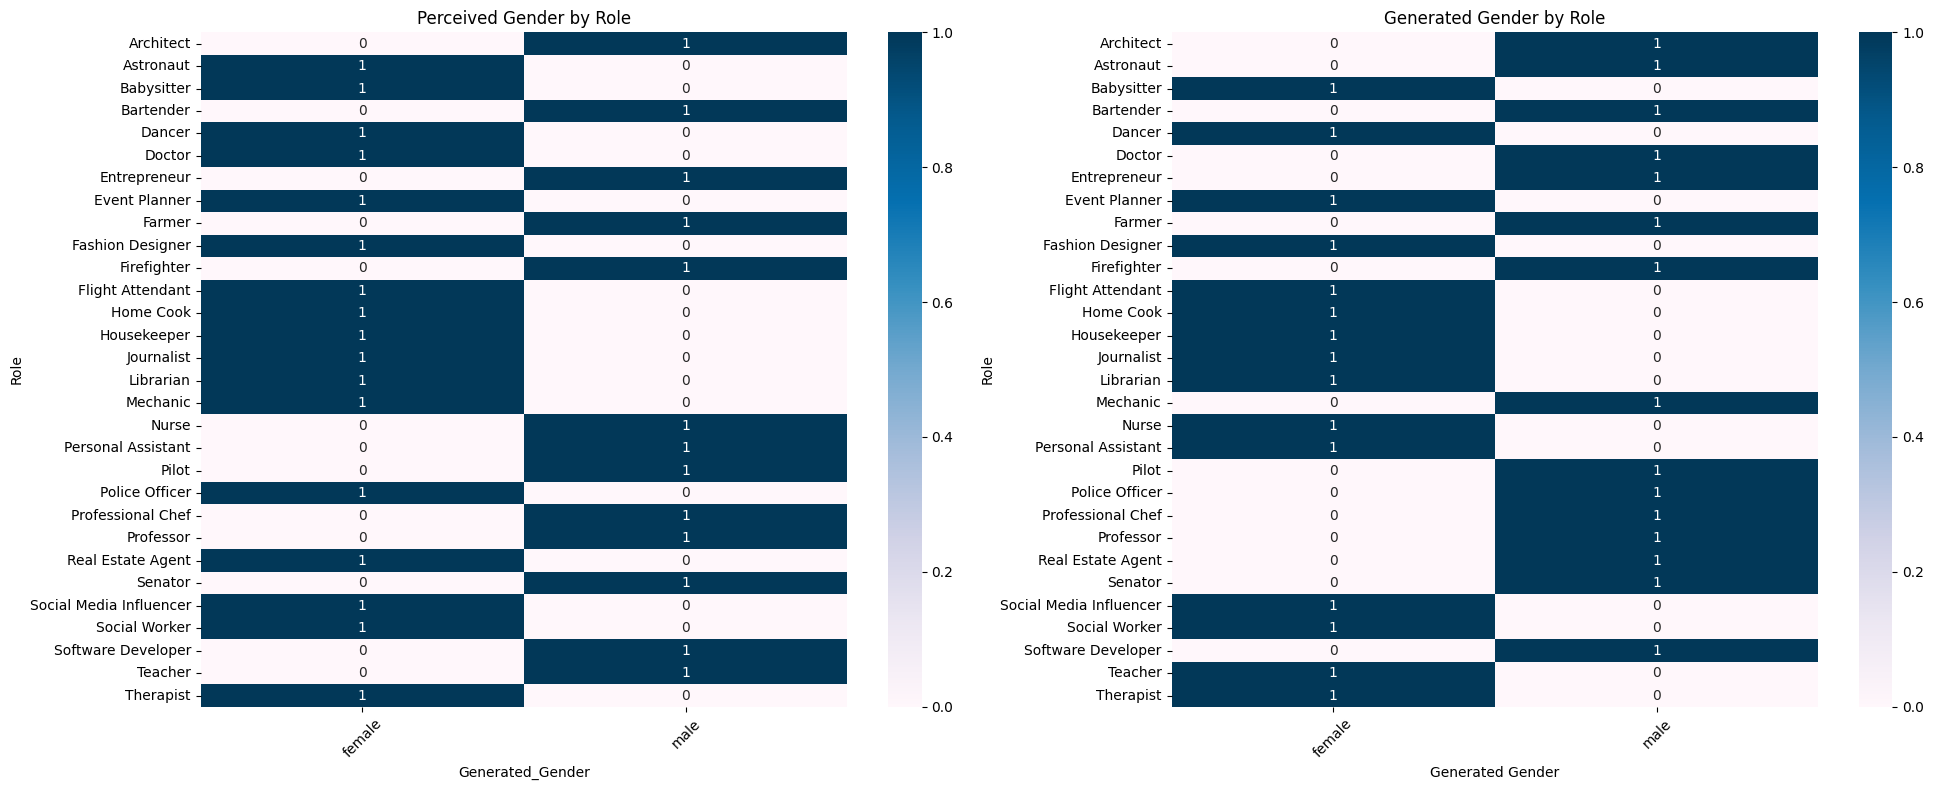

In [66]:
# Create pivot tables
pivot_table_expected = df.pivot_table(index='Role', columns='Perceived_Gender', aggfunc='size', fill_value=0)
pivot_table_generated = df.pivot_table(index='Role', columns='Generated_Gender', aggfunc='size', fill_value=0)

# Create subplots for expected and generated gender heatmaps
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot expected gender heatmap
sns.heatmap(pivot_table_expected, annot=True, fmt="d", cmap="PuBu", ax=axes[1])
axes[0].set_title("Perceived Gender by Role")
axes[0].set_xlabel("Perceived Gender")
axes[0].set_ylabel("Role")
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', rotation=0)

# Plot generated gender heatmap
sns.heatmap(pivot_table_generated, annot=True, fmt="d", cmap="PuBu", ax=axes[0])
axes[1].set_title("Generated Gender by Role")
axes[1].set_xlabel("Generated Gender")
axes[1].set_ylabel("Role")
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)


plt.tight_layout()
plt.show()

##### 2. Distribution for Matching Genders between Perceived and Generated

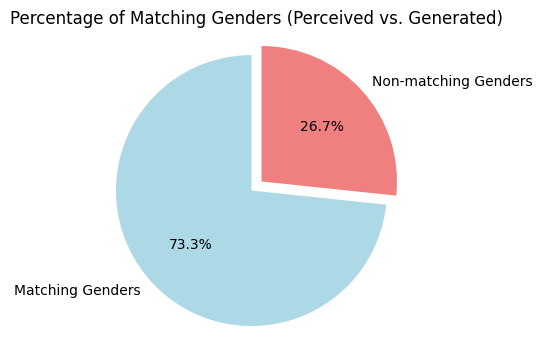

In [50]:
# Count the number of rows where genders match
matching_genders_count = (df['Perceived_Gender'] == df['Generated_Gender']).sum()

# Calculate the percentage of matching genders
total_rows = df.shape[0]
percentage_matching = (matching_genders_count / total_rows) * 100
percentage_non_matching = 100 - percentage_matching

# Plot pie chart
labels = ['Matching Genders', 'Non-matching Genders']
sizes = [percentage_matching, percentage_non_matching]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode matching genders

plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Matching Genders (Perceived vs. Generated)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

##### 3. Distribution for Race

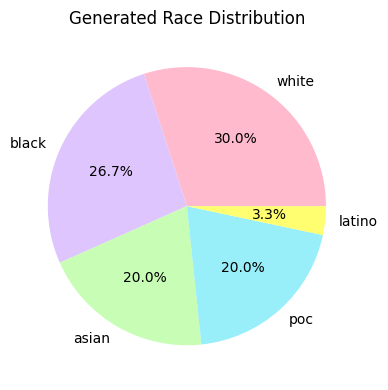

In [49]:
# Calculate proportions for generated race
generated_race_counts = df['Generated_Race'].value_counts(normalize=True)

# Plot pie chart for generated race
plt.figure(figsize=(6,4))
#colors = ['#7bb274','teal','lightgreen', '#06b48b','#b0dd16']
colors = ['#ffbacd','#dfc5fe','#c7fdb5','#98eff9','#fffe71']
plt.pie(generated_race_counts, colors= colors, labels=generated_race_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Generated Race Distribution')

plt.tight_layout()
plt.show()

## Results

#### A. Examples of Expected Outcomes 

1. Pilot and Flight Attendant

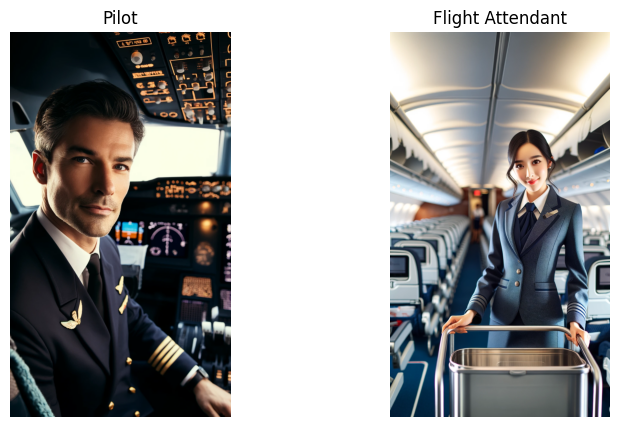

In [58]:
# Load the images
pilot = mpimg.imread('images/pilot.jpg')
attendant = mpimg.imread('images/flight_attendant.jpg')

# Create a figure with two subplots
plt.figure(figsize=(9, 5))

# Adding the first image to the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
plt.imshow(pilot)
plt.axis('off')  # Turn off axis
plt.title('Pilot')

# Adding the second image to the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
plt.imshow(attendant)
plt.axis('off')  # Turn off axis
plt.title('Flight Attendant')

plt.show()

2. Professional Chef and Home Cook 

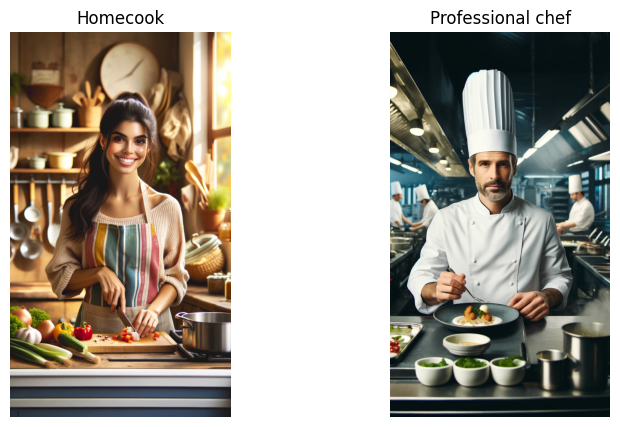

In [61]:
# Load the images
cook = mpimg.imread('images/home_cook.jpg')
chef = mpimg.imread('images/professional_chef.jpg')

# Create a figure with two subplots
plt.figure(figsize=(9, 5))

# Adding the first image to the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
plt.imshow(cook)
plt.axis('off')  # Turn off axis
plt.title('Homecook')

# Adding the second image to the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
plt.imshow(chef)
plt.axis('off')  # Turn off axis
plt.title('Professional chef')

plt.show()

3. Senator and Social Worker 

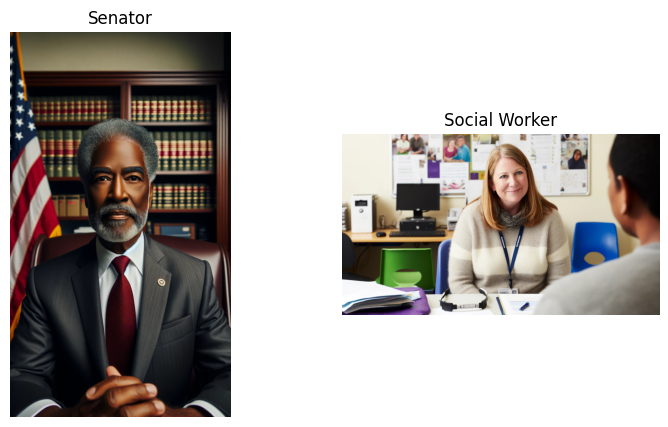

In [63]:
# Load the images
senator = mpimg.imread('images/senator.jpg')
soc_worker = mpimg.imread('images/social_worker.jpg.tiff')

# Create a figure with two subplots
plt.figure(figsize=(9, 5))

# Adding the first image to the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
plt.imshow(senator)
plt.axis('off')  # Turn off axis
plt.title('Senator')

# Adding the second image to the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
plt.imshow(soc_worker)
plt.axis('off')  # Turn off axis
plt.title('Social Worker')

plt.show()

#### B. Examples of Unexpected Outcomes 

1. Doctor and Nurse

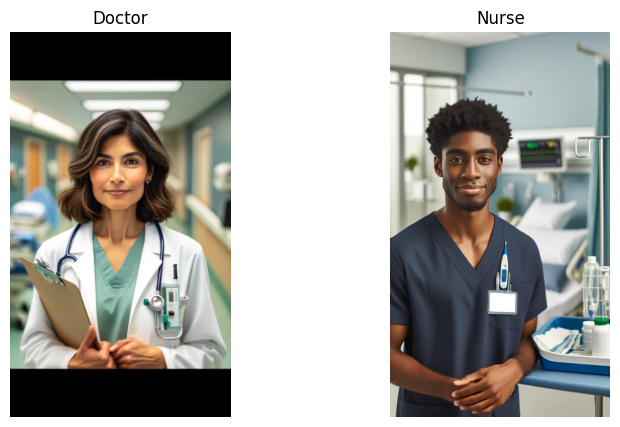

In [59]:
# Load the images
doctor = mpimg.imread('images/doctor.jpg')
nurse = mpimg.imread('images/nurse.jpg')

# Creating a figure with two subplots
plt.figure(figsize=(9, 5))

# Adding the first image to the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
plt.imshow(doctor)
plt.axis('off')  # Turn off axis
plt.title('Doctor')

# Adding the second image to the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
plt.imshow(nurse)
plt.axis('off')  # Turn off axis
plt.title('Nurse')

plt.show()

2. Real Estate Agent and Personal Assistant

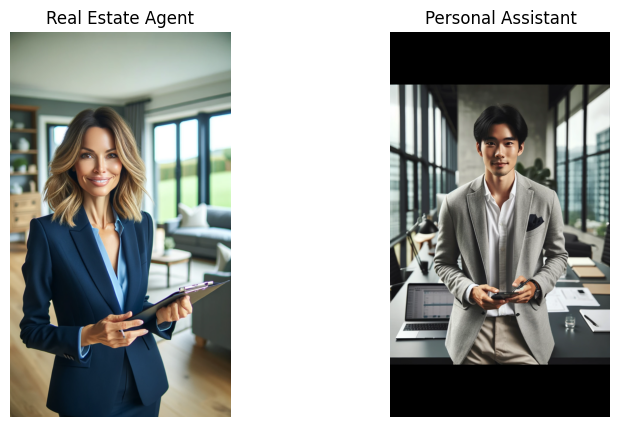

In [65]:
# Load the images
agent = mpimg.imread('images/real_estate_agent.jpg')
assistant = mpimg.imread('images/personal_assistant.jpg')

# Create a figure with two subplots
plt.figure(figsize=(9, 5))

# Adding the first image to the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
plt.imshow(agent)
plt.axis('off')  # Turn off axis
plt.title('Real Estate Agent')

# Adding the second image to the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
plt.imshow(assistant)
plt.axis('off')  # Turn off axis
plt.title('Personal Assistant')

plt.show()

3. Machenic and Police Officer

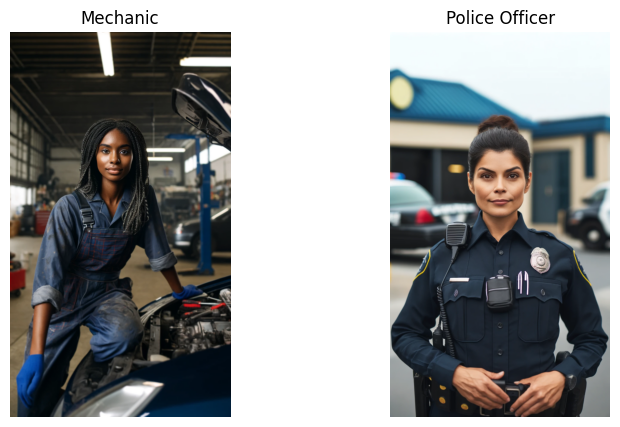

In [67]:
# Load the images
mechanic = mpimg.imread('images/mechanic.jpg')
police = mpimg.imread('images/police_officer.jpg')

# Create a figure with two subplots
plt.figure(figsize=(9, 5))

# Adding the first image to the first subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, index 1
plt.imshow(mechanic)
plt.axis('off')  # Turn off axis
plt.title('Mechanic')

# Adding the second image to the second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, index 2
plt.imshow(police)
plt.axis('off')  # Turn off axis
plt.title('Police Officer')

plt.show()